# Fractal Analysis

## Candidate Name - Kamuni Suhas

#### Importing necessary libraries and the data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nolds as nd
from nolds import dfa # for detrended fluctuation
df = pd.read_csv(r'C:\Users\ganga\Downloads\intern_dataset.csv')
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


Checking for missing values

In [2]:
Count = df.isnull().sum()
Perc = round(Count / 181691 * 100, 2)
series = [Count,Perc]
R_lt = pd.concat(series, keys=['Count','Percentage'] ,axis=1) # making a data frame of missing values and its count
R_lt.sort_values(by='Count', ascending=False).head() # sorting and printing

,Count,Percentage
Time,0,0.0
Signal1,0,0.0
Signal2,0,0.0
Label,0,0.0


In [3]:
#data types of the given data set
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     912000 non-null  object 
 1   Signal1  912000 non-null  float64
 2   Signal2  912000 non-null  float64
 3   Label    912000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


In [4]:
#grouping by the label and their respective mean
df.groupby(['Label']).mean()

,Signal1,Signal2
Label,,
A,30900.207581,0.371612
B,31693.976570,0.642296
C,31364.681913,0.157482


In [5]:
#statistical parameters of Signal 1 and Signal 2
df.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


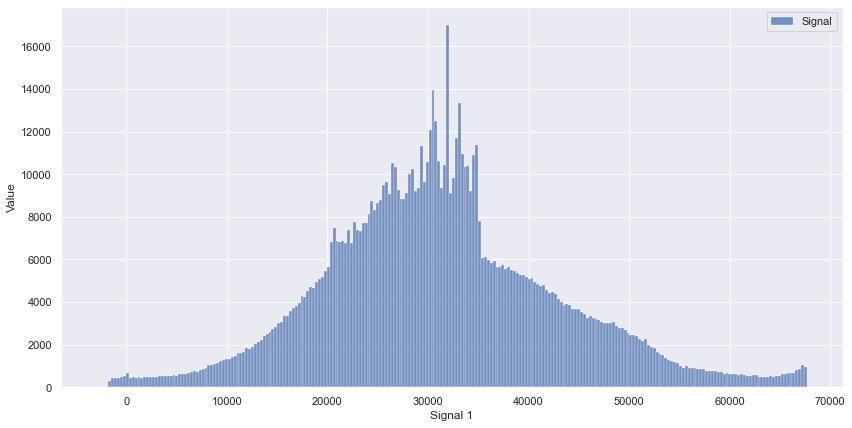

In [6]:
#histogram of Signal 1
plt.figure(figsize=(14,7))
sns.set()
sns.histplot(df["Signal1"], label = "Signal")
plt.xlabel("Signal 1")
plt.ylabel("Value")
plt.legend()  
plt.show()

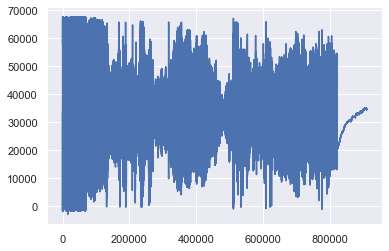

In [7]:
#General plot of entire Signal 1
plt.plot(df['Signal1'][:])

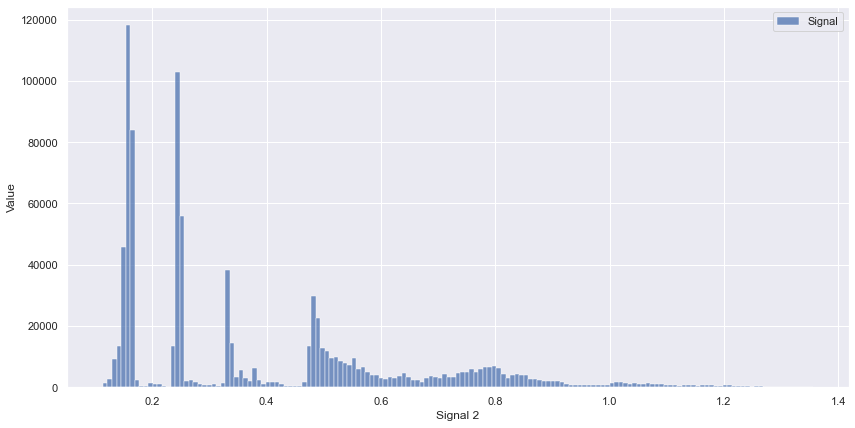

In [8]:
#Histogram of entire Signal 2
plt.figure(figsize=(14,7))
sns.set()
sns.histplot(df["Signal2"], label = "Signal")
plt.xlabel("Signal 2")
plt.ylabel("Value")
plt.legend()  
plt.show()

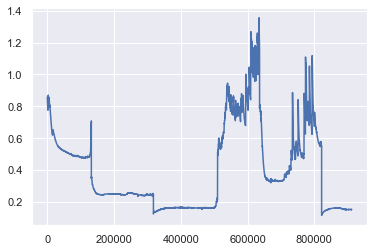

In [9]:
#General plot of entire Signal 2
plt.plot(df['Signal2'][:])

Text(0, 0.5, 'Signal 2')

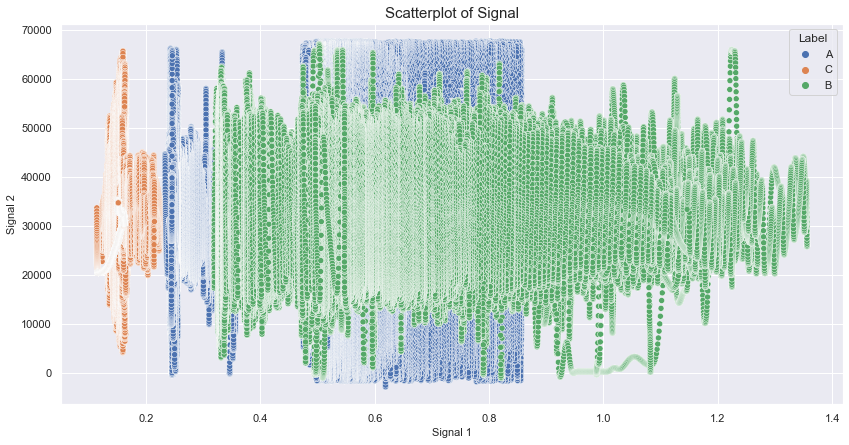

In [10]:
#Scatterplot of both the signals 
plt.figure(figsize=(14,7))
sns.scatterplot(x='Signal2',y = 'Signal1', data = df, hue = 'Label')
plt.title("Scatterplot of Signal", fontsize =15)
plt.xlabel("Signal 1", fontsize =11)
plt.ylabel("Signal 2", fontsize =11)

# Fractal Analysis on Hurst Exponent

#### If H = 0.5  -> Complete Random Behavior

#### When 0.5 < H < 1.0 -> Consistent behavior, that means if it increases, it continues to do so till the end

#### When 0 < H < 0.5 -> oppsite of consistent behavior, which means, if the tally increases for certian period, then the graph is deemed to decrease further

# Detrended Fluctuation Analysis

#### DFA is a method for determining the statistical self-affinity of a signal. It is useful for analysing time series that appear to be long-memory processes.

#### If the DFA coefficient(Alpha) <1/2 then it is anti-correlated

#### when Alpha = 1/2: uncorrelated and mostly consists of white noise

#### when Alpha >1/2: correlated

#### when Alpha = 1: 1/f-noise and pink noise

#### when Alpha >1: non-stationary and unbounded

#### when Alpha = 3/2: Brownian noise

# Lyapunov Exponent 

Lyapunov exponent (LE) is an eigenvalue to describe chaos system. About multidimensions system, correlative Lyapunov exponents are combined together to come into being Lyapunov exponent chart (LEC) for further investigation. For dissipative system, not only the LEC describes character of different orbit, but also it describes the character stability of all orbits that depart from basin of attraction of an attractor. For one dimension system, attractor is fixed point. The LE is negative. For two dimensions system, attractor is fixed point or it is a limit cycle. If it is a fixed point, the distance between two close up points of random direction will shrink in phase space.

In [11]:
#Hurst Exponent function
def h_e(data_frame):
    return nd.hurst_rs(data_frame,debug_plot=True)
#DFA function
def d_f_a(d_f):
    return nd.dfa(data=d_f,debug_plot=True) 
#Lyupanov Exponent Function
def l_e(data_frame):
    return nd.lyap_r(data_frame)

# Analysis on Label A

### Hurst Exponent  

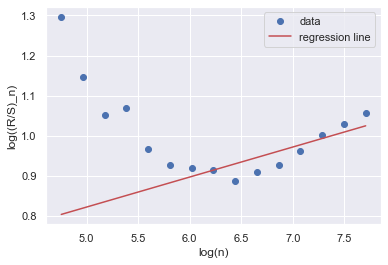

0.5747595732623282

In [12]:
dfa1=df[df.Label=='A']['Signal1']#separate variable for Signal 1 grouped by B
dfa2=df[df.Label=='A']['Signal2']#separate variable for Signal 2 grouped by B
h_e(dfa1)

Above Hurst Exponent is above to 0.5. and just below 0.6. It's fair to consider this to be close to brownian motion and follows slight persistent behavior. Meaning given Signal 1 is completely uncorrelated with sight autocorrelation, this trend will continue. Thus hurst exponent is directly related to dimension of line, we can observe that dimension of the signal is 1.425 means it is neither too rough or too smooth, in other words its random fluctuation thats balance with highs and lows.

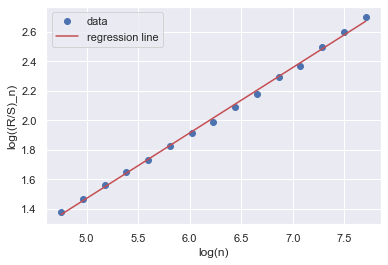

0.9436455006528913

In [13]:
#Hurst Exponent of Label A of Signal 2
h_e(dfa2)

Here Hurst Exponent is also below 1. So this Signal 2 follows a persistent pattern of Signal 1. Meaning time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

### Detrended Fluctuation Analysis

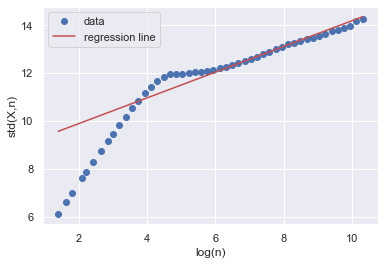

0.5353339556033679

In [14]:
#DFA of Label A of Signal 1
d_f_a(dfa1)

Signal 1 has a low DFA score hence suggesting a high complexity. This is seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large hence intricate details are lost.

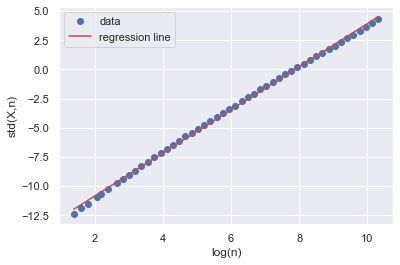

1.8449455786234312

In [15]:
#DFA of Label A of Signal 2
d_f_a(dfa2)

Signal 2 has a high DFA score hence suggesting a low complexity. This is seen in the graph with small log(n) or in other words even when the number of windows is small the data line and the regression line are still close to each other.

### Lyapunov Exponent

In [16]:
#Lyapunov Exponent for Signal 1
l_e(dfa1[:10000])

C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.030583075114658978

Signal 1's flow and the trajectory will not quickly converge to a single point.

In [17]:
#Lyapunov Exponent for Signal 1
l_e(dfa2[:10000])

C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


8.140650010640158e-05

Signal 2's trajectory will quickly converge to a single point. Meaning the signal will reach critical stituation very quickly.

# Analysis For Label B

### Hurst Exponent 

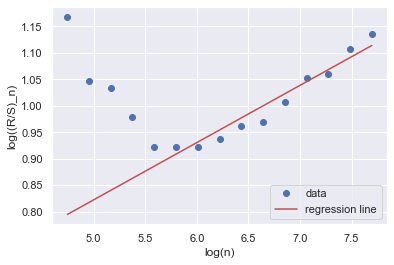

0.6082193903732963

In [18]:
dfb1=df[df.Label=='B']['Signal1']#separate variable for Signal 1 grouped by B
dfb2=df[df.Label=='B']['Signal2']#separate variable for Signal 2 grouped by B
#Hurst Exponent of Label B of Signal 1
h_e(dfb1)

Hurst exponent is above 0.5 and close to 0.5. Signal 1 is exactly similar to Signal 1 of label A in terms of hurst exponent. Therefore, we can see the slight persistent pattern followed in dimension as well. Which denotes the signal is fluctuating slightly autocorrelated.

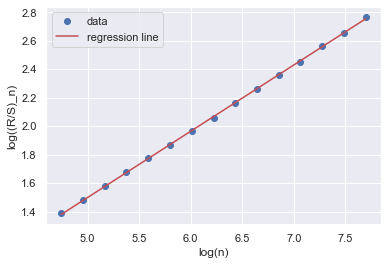

0.9656017582527002

In [19]:
#Hurst Exponent of Label B of Signal 2
h_e(dfb2)

Signal 2 has hurst exponent is 0.96 which is under 1. Which tells that signal is hightly persistent .It is also similar to Signal 2 label A.

### Detrended Flucatuation Analysis 

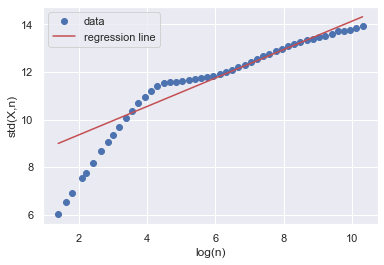

0.5966505334714576

In [20]:
#DFA of Label B of Signal 1
d_f_a(dfb1)

Signal 1 of Class B has a low DFA score hence suggesting a high complexity. This is seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large hence intricate details are lost.

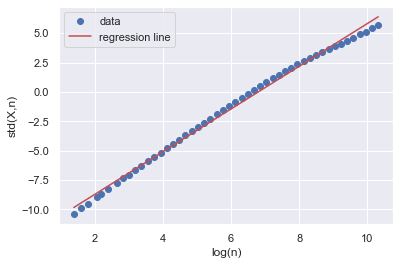

1.817671427084879

In [21]:
#DFA of Label B of Signal 2
d_f_a(dfb2)

Signal 2 of Class B has a high DFA hence suggesting a low complexity. This is seen in the graph as log(n) or in other words the number of windows is small the data line and the regression line are still close to each other.

### Lyapunov Exponent 

In [22]:
#Lyapunov Exponent for Signal 1
l_e(dfb1[:10000])

C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


0.033403809963733724

Signal 1 is most likely a flow and the trajectory wont quickly converge to a single point¶

In [23]:
l_e(dfb2[:10000])

C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


4.1097075074693325e-05

Signal 2 is dissipative, the sum of Lyapunov exponents is negative. Meaning the signal is oscillating far from equilibrium.

# Analysis for Label C

### Hurst Exponent 

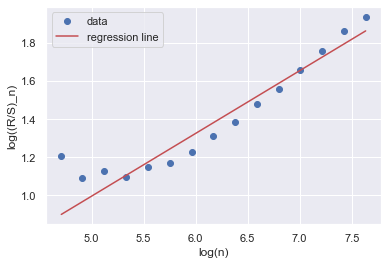

0.8292981622514977

In [24]:
dfc1=df[df.Label=='C']['Signal1']#separate variable for Signal 1 grouped by Label C
dfc2=df[df.Label=='C']['Signal2']#separate variable for Signal 2 grouped by Label C
#Hurst Exponent of Label C of Signal 1
h_e(dfc1)

Signal 1 hurst exponent is under 0.1. Meaning the signal's trend will be always autocorrelated and persistent.

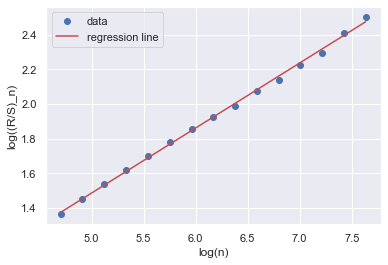

0.8748319171563598

In [25]:
#Hurst Exponent of Label C of Signal 2
h_e(dfc2)

hurst exponent is similar to Signal 1 and follows similar trends like autocorrelation

### Detrended Fluctuation Analysis

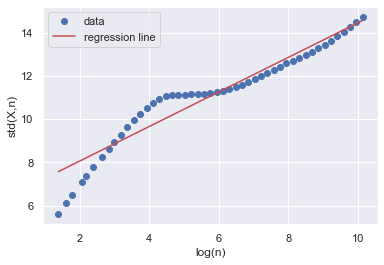

0.7986382286757443

In [26]:
#DFA of Label C of Signal 1
d_f_a(dfc1)

Signal 1 has a low DFA score hence suggesting a high complexity. This is seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large hence intricate details are lost.

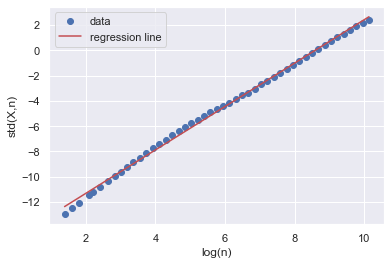

1.7160380861830362

In [27]:
#DFA of Label C of Signal 2
d_f_a(dfc2)

Signal 2 on the other hand has a high DFA hence suggesting a low complexity. This is seen in the graph as log(n) or in other words the number of windows is small the data line and the regression line are still close to each other.

### Lyapunov Exponent

In [28]:
l_e(dfc1[:10000])

C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


0.05690026545262556

Signal 1 is likely a flow and the trajectory wont quickly converge to a single point.

In [29]:
l_e(dfc2[:10000])

C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\ganga\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


0.00031196049281534524

Signal 2 is a flow and the trajectory does not converge to a single point

# Conclusion

Signal 1 of Class A has a low DFA and low HURST score amongst all classes and both signals. This was seen in the bar graphs drawn above hence suggesting the highest complexity. This has been also supported by the line graphs drawn under the respective sections of analysis. It was seen in the graph that with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large hence intricate details are lost.

The Signal 1 of Class A is the highest complexity for the whole data set.

When Signal 2 is considered individually Class C has the highest complexity.

1. Based on DFA: Higher the slope (DFA value), higher is the complexity of the system. Class C has slope of 0.79 for Signal1, i.e. class C has highest DFA value(highest slope) which indicates it is the most complex class for Signal1. For Signal2, all the classes have similar DFA value, but class A has most DFA value. Still, signal2 is not conclusive for complexity but from signal1, I can say that: Class C is the most complex class.

2. Based on Hurst Exponent: For all classes of all signals, the hurst exponent is more than 0.5, which means that the time series is persistent. The more closer the value of Hurst exponent to 1, the more complex the time series would be. For Signal2, Hurst exponent has very similar values for all classes. From Signal1 we find that Class A and B both have very similar and least Hurst exponent. Class C has highest Hurst exponent of 0.7986. So class C is most complex class from Hurst exponent analysis.

3.  Based on Lyapunov Exponent: It is clear that while label A has signal 2 that is likely to converge at a point, Signal 2 of label B is oscillating around the equilibrium. Looking at Label c on the other hand, non of both signals converge at a point, which clearly indicates the complexity of label C being the most complex label of the bunch.

References

https://en.wikipedia.org/wiki/Fractal_dimension#Estimating_from_real-world_data

https://www.researchgate.net/publication/303690278_Application_of_Higuchi's_fractal_dimension_from_basic_to_clinical_neurophysiology_A_review

https://www.intechopen.com/books/fractal-analysis-selected-examples/fractal-analysis-for-time-series-datasets-a-case-study-of-groundwater-quality